
<h1 style="text-align:center;">Ensembles with Bagging</h1>

 Bagging, or Bootstrap Aggregating, is an ensemble method in machine learning where several instances of the same algorithm are run, each on a slightly different subset of the training data generated through sampling with replacement (bootstrap samples). These bootstrap samples typically have the same size as the original dataset. In bagging, the different models are trained independently from each other and their predictions are aggregated to make a final prediction. For classification problems, this is typically done by taking a majority vote, while for regression problems the mean prediction is used. The aim of bagging is to reduce the variance of a prediction by combining multiple estimates.

The statement "..._sampling with replacement_..." refers to the method of creating ne datasets (bootstrap samples) from the original dataset, where each new dataset is constructed by randomly selecting instances from the original dataset, and after each selection, the chosen instance is placed back into the original dataset, making it available to be potentially selected again in the same new dataset.

**Billiards/Snooker**

Imagine you are playing a game of billiards or snooker. In a "bagging scenario", instead of relying on a single shot to pot a difficult ball, you would have the opportunity to take multiple shots from slightly different angles or positions (these represent different bootstrap samples). After taking all these shots, the "final shot" would be determined by the majority outcome of all those shots. For instance, if most of the shots pot the ball successfully, the final outcome is considered successful.

In this case:
- Each shot at the ball represents a model in the ensemble.
- The slight variations in angles or positions represent the different subsets of data (bootstrap samples).
- The final outcome, determined by the majority of individual outcomes, represents the aggregated prediction of the ensemble.

## Random forest classifiers
We will take our time to use a random forest classifier to predict whether a user makes more or less than US$ 50,000 using the census dataset.

In [27]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
# Import train_test_split
from sklearn.model_selection import (train_test_split, GridSearchCV, 
                            RandomizedSearchCV, cross_val_score
                                    )

# Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


# Import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn import tree
from sklearn.metrics import mean_squared_error, accuracy_score

from sklearn.utils import shuffle

from category_encoders import OneHotEncoder

from helper_file import *

import seaborn as sns

sns.set()

warnings.filterwarnings('ignore')

In [2]:
df_census.sample(n=3, random_state=43)

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
23468,21,Private,202871,9,Never-married,Sales,Own-child,White,Male,0,0,44,United-States,<=50K
17285,29,Self-emp-not-inc,212895,10,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,48,United-States,<=50K
21182,24,Local-gov,187397,10,Never-married,Protective-serv,Unmarried,Other,Male,1151,0,40,United-States,<=50K


In [3]:
cen_X, cen_y = splitX_y(df_census, 'income')

print(f"shape of target vector: {cen_y.shape}")
print(f"shape of feature matrix: {cen_X.shape}")

shape of target vector: (32561,)
shape of feature matrix: (32561, 13)


In [4]:
rfc = RandomForestClassifier(n_estimators=10, 
                            random_state=2, 
                            n_jobs=-1)

rfc_pipe = Pipeline(
    [('ohe', OHETransformer()),
     ('rfc', rfc)
    ]
)
scores = cross_val_score(rfc_pipe, cen_X, cen_y, scoring='accuracy', cv=10)


print(f'Accuracy: {np.round(scores, 2)}')

print(f'Accuracy mean: {scores.mean()}')

Accuracy: [0.84 0.86 0.85 0.85 0.86 0.85 0.85 0.85 0.86 0.86]
Accuracy mean: 0.8515404545416827


### Random Forest Hyperparameters

We will take a leisurely stroll through the world of random forest hyperparameters. Picture a forest, a vast entity where each tree contributes to the overall wisdom. Now, let's break this down step by step:

#### Out-of-Bag Score (oob_score)

- **Concept:** You see, in our forest, we select trees through a process akin to drawing marbles from a bag, sometimes picking the same one multiple times. Interestingly, this means we leave some marbles untouched, giving us an excellent opportunity to test our forest's wisdom using these untouched samples.
- **Practical Usage:** By setting `oob_score=True`, you essentially tell the forest, "Hey, use those untouched samples as a test set and let me know how well you did!" 

In [5]:
census_pipe = Pipeline(
    [('ohe', OHETransformer())]
)

cen_X, cen_y = splitX_y(df_census, 'income')

print(f"shape of target vector: {cen_y.shape}")
print(f"shape of feature matrix: {cen_X.shape}")

shape of target vector: (32561,)
shape of feature matrix: (32561, 13)


In [6]:
cen_X_train, cen_X_test, cen_y_train, cen_y_test = (model_selection
                                    .train_test_split(cen_X, cen_y, 
                                                      test_size=.3, 
                                                      random_state=43,)
                                                        )

X_train = census_pipe.fit_transform(cen_X_train)
X_test = census_pipe.transform(cen_X_test)

In [7]:
# Intialize Random Forest Classifier with oob_score=True
rfc = RandomForestClassifier(oob_score=True, n_estimators=10, random_state=2, n_jobs=-1)

# Fit Random Forest on Census Dataset
rfc.fit(X_train, cen_y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, oob_score=True,
                       random_state=2)

In [8]:
# Display oob score
rfc.oob_score_

0.8306423306423306

#### Number of Trees (n_estimators)

- **Concept:** The beauty of a forest is in its diversity and vastness. Similarly, our model's strength lies in having a multitude of trees, each learning and contributing its share to the collective intelligence.
- **Practical Usage:** Initially, having more trees indeed adds wisdom to our forest. But as we keep increasing the number, the gains start to diminish. It's like adding more scholars to a council; beyond a point, the additional insights are minimal.

Let's change `n_estimators` to 50 and then 100 to see how the output of the `oob_score` also changes.

In [9]:
rfc = RandomForestClassifier(oob_score=True, n_estimators=50, random_state=43, n_jobs=-1)
rfc.fit(X_train, cen_y_train)
rfc.oob_score_

0.8491575991575991

In [10]:
rfc = RandomForestClassifier(oob_score=True, n_estimators=100, random_state=43, n_jobs=-1)
rfc.fit(X_train, cen_y_train)
rfc.oob_score_

0.851965601965602

We can definitely see some changes. Let us go on tweaking the dials further.

#### Warm Start

- **Concept:** Imagine if, instead of starting from scratch each time we wanted to add more trees to our forest, we could just pick up where we left off. That's precisely what `warm_start=True` allows us to do.
- **Practical Usage:** This setting is like a wise forest conservation strategy, saving time and effort by allowing for a seamless expansion of our tree council, without redoing the hard work already done.

We are going to create a plot to see how things are looking up here.

In [11]:
oob_scores = []

rfc = RandomForestClassifier(n_estimators=50, 
                            warm_start=True, 
                            oob_score=True, 
                            n_jobs=-1, random_state=43)

rfc.fit(X_train, cen_y_train)

oob_scores.append(rfc.oob_score_)

est = 50

estimators=[est]

for i in range(9):

    est += 50

    estimators.append(est)

    rfc.set_params(n_estimators=est)

    rfc.fit(X_train, cen_y_train)

    oob_scores.append(rfc.oob_score_)

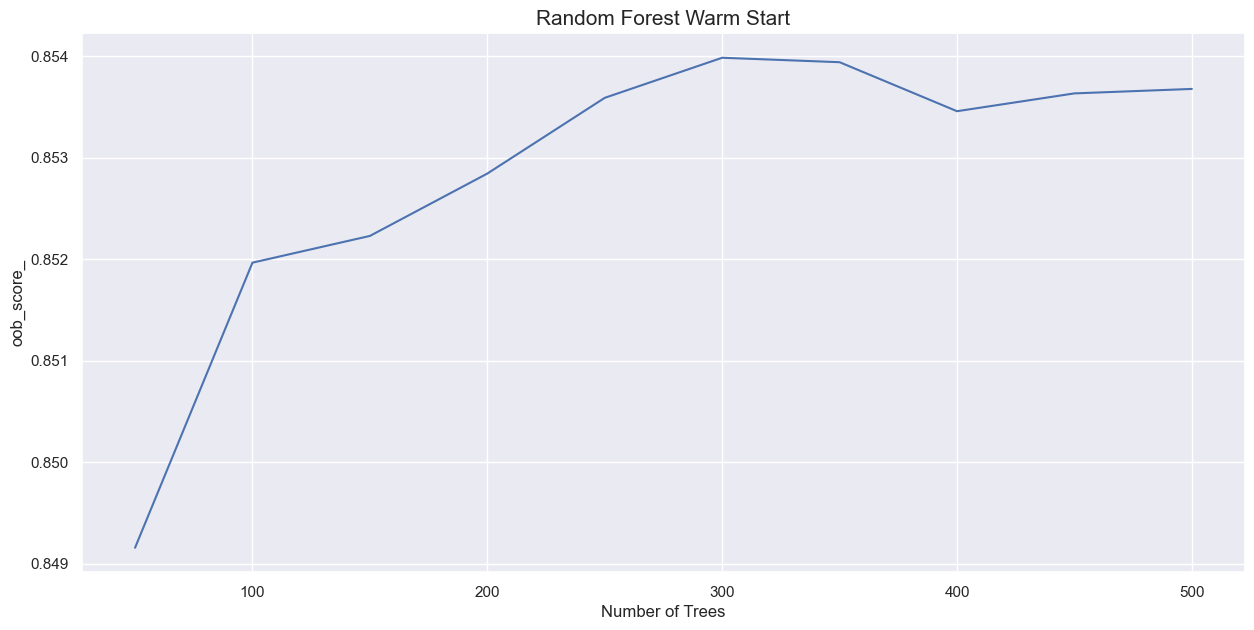

In [12]:
plt.figure(figsize=(15,7))

plt.plot(estimators, oob_scores)

plt.xlabel('Number of Trees')

plt.ylabel('oob_score_')

plt.title('Random Forest Warm Start', fontsize=15)

plt.savefig('Random_Forest_Warm_Start', dpi=325)

_=plt.show()

As you can see, the number of trees tends to peak at around 400. It's more costly and time-consuming to use more trees than 400, and the gains are minimal at best.

### Bootstrap

- **Concept:** Bootstrapping is akin to the natural regeneration of a forest, allowing new trees to sprout from the seeds of the existing ones. However, if desired, this process can be stopped, akin to planting a garden with selected plants only.
- **Practical Usage:** Generally, we let nature take its course (bootstrap=True), but if underfitting occurs, we might choose to plant specific trees (bootstrap=False), knowing that the `oob_score` won't be available in this managed setting.

### Verbose

- **Concept:** Sometimes, while nurturing our forest, we might want to keep a keen eye on its growth stages, noting down the intricate details. This is where the `verbose` parameter steps in, providing us with a detailed narrative of the forest's growth.
- **Practical Usage:** Especially for large forests, setting `verbose=1` can be like having a detailed diary that chronicles the journey, offering insights that might be valuable.

### Decision Tree Hyperparameters

Now, let's zoom into a single tree and understand the nuances that govern its structure and growth:

#### Depth

- **max_depth:** Think of this as controlling how tall our trees can grow. A taller tree (more depth) can have more branches, but we don't want it to touch the sky, do we? Tuning this parameter helps maintain a balance, allowing for a tree tall enough to provide wisdom without overshadowing others.

#### Splits

- **max_features:** This parameter is like instructing our tree on the number of different nutrients (features) it can use to decide where to branch out.
- **min_samples_split:** Here, we set a threshold for the minimum congregation needed at a point to form a new branch.
- **min_impurity_decrease:** This one's a bit of quality control, ensuring that a new branch only forms if it brings a substantial improvement in purity.

#### Leaves

- **min_samples_leaf:** Like a council at the end of a branch (leaf), we dictate the minimum number of members needed to form this council.
- **min_weight_fraction_leaf:** Here, we're defining the minimum proportion of the total 'weight' or importance that should be present at a leaf, ensuring a balanced representation.

Remember, it's all about nurturing a balanced, wise, and insightful forest.


## Random forest regressors

In a random forest regressor, the samples are bootstrapped, as with the random forest Classifier, but the max number of features is the total number of features instead of the square root. This change is due to experimental results. Furthermore, the final prediction is made by taking the average of the predictions of all the trees, instead of a majority rules vote.

Let us work that out with the bike rental dataset.

In [13]:
df_bikes.sample(n=3, random_state=43)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
335,336,2011-12-02,4.0,0.0,12.0,0.0,5.0,1.0,1,0.314167,0.331433,0.625833,0.100754,268,3672,3940
631,632,2012-09-23,4.0,1.0,9.0,0.0,0.0,0.0,1,0.529167,0.518933,0.467083,0.223258,2454,5453,7907
620,621,2012-09-12,3.0,1.0,9.0,0.0,3.0,1.0,1,0.599167,0.570075,0.577083,0.131846,1050,6820,7870


In [14]:
bikes_X, bikes_y = splitX_y(df_bikes, 'cnt')

print(f"shape of target vector: {bikes_y.shape}")
print(f"shape of feature matrix: {bikes_X.shape}")

shape of target vector: (731,)
shape of feature matrix: (731, 15)


In [15]:
rfr = RandomForestRegressor(n_estimators=10, 
                            random_state=43, 
                            n_jobs=-1)

rfr_pipe = Pipeline(
    [('tweak', PrepDataTransformer()),
     ('imputer', SimpleImputer(strategy='median')),  # Imputing null values using mean
     ('scaler', StandardScaler()),
     ('rfr', rfr)
    ]
)
scores = cross_val_score(rfr_pipe, bikes_X, bikes_y, scoring='neg_mean_squared_error', cv=10)

rmse = np.sqrt(-scores)

print(f'RMSE: {np.round(rmse, 2)}')

print(f'RMSE mean: {rmse.mean():.3f}')

RMSE: [ 867.18  595.17  517.24  807.87  895.54  880.33  915.73  823.14  777.07
 2471.45]
RMSE mean: 955.073


In [16]:
rfr = RandomForestRegressor(n_estimators=50, 
                            random_state=43, 
                            n_jobs=-1)

rfr_pipe = Pipeline(
    [('tweak', PrepDataTransformer()),
     ('imputer', SimpleImputer(strategy='median')),  # Imputing null values using mean
     ('scaler', StandardScaler()),
     ('rfr', rfr)
    ]
)
scores = cross_val_score(rfr_pipe, bikes_X, bikes_y, scoring='neg_mean_squared_error', cv=10)

rmse = np.sqrt(-scores)

print(f'RMSE: {np.round(rmse, 2)}')

print(f'RMSE mean: {rmse.mean():.3f}')

RMSE: [ 796.84  563.66  528.32  805.29  848.43  695.21  877.71  778.12  785.59
 2277.  ]
RMSE mean: 895.617


In [17]:
rfr = RandomForestRegressor(n_estimators=100, 
                            random_state=43, 
                            n_jobs=-1)

rfr_pipe = Pipeline(
    [('tweak', PrepDataTransformer()),
     ('imputer', SimpleImputer(strategy='median')),  # Imputing null values using mean
     ('scaler', StandardScaler()),
     ('rfr', rfr)
    ]
)
scores = cross_val_score(rfr_pipe, bikes_X, bikes_y, scoring='neg_mean_squared_error', cv=10)

rmse = np.sqrt(-scores)

print(f'RMSE: {np.round(rmse, 2)}')

print(f'RMSE mean: {rmse.mean():.3f}')

RMSE: [ 789.9   543.26  523.07  809.69  871.38  695.84  846.45  794.76  775.62
 2295.03]
RMSE mean: 894.501


In [18]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import logging

def randomized_search_rfr(df, target_column, params, transformer, runs=16, 
                          rfr=None, verbose=1, random_state=43):
    """
    This function performs a randomized search for hyperparameter tuning on a RandomForestRegressor.
    
    Parameters:
    - df (pd.DataFrame): The input data frame.
    - target_column (str): The column name of the target variable.
    - params (dict): The parameter grid to explore.
    - transformer (Transformer): A transformer instance to process the data before fitting the model.
    - runs (int): The number of parameter settings that are sampled. Defaults to 16.
    - rfr (RandomForestRegressor): The RandomForestRegressor instance. If None, a new instance will be created.
        Defaults to None.
    - verbose (int): The verbosity level. Defaults to 1.
    - random_state (int): The seed used by the random number generator. Defaults to 43.
    
    Returns:
    - dict: A dictionary containing the best model, best parameters, training score, and test score.
    """
    if rfr is None:
        rfr = RandomForestRegressor(random_state=random_state, n_jobs=-1)
    
    # Split the data into features and target variable
    df_X = df.drop(columns=[target_column])
    df_y = df[target_column]
    
    # Split the data into training and testing sets
    df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(
        df_X, df_y, test_size=0.2, random_state=random_state)
    
    # Create a pipeline
    rfr_pipe = Pipeline([
        ('tweak', transformer),
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('rfr', rfr)
    ])

    # Instantiate RandomizedSearchCV
    rand_reg = RandomizedSearchCV(rfr_pipe, params, n_iter=runs, 
                                  scoring='neg_mean_squared_error', 
                                  cv=10, n_jobs=-1, verbose=verbose, 
                                  random_state=random_state)
    
    # Fit RandomizedSearchCV
    rand_reg.fit(df_X_train, df_y_train)
    
    # Extract best estimator and parameters
    best_model = rand_reg.best_estimator_
    best_params = rand_reg.best_params_
    
    # Compute training and test scores
    training_score = np.sqrt(-rand_reg.best_score_)
    y_pred = best_model.predict(df_X_test)
    test_score = MSE(df_y_test, y_pred)**0.5
    
    # Log the results
    logging.info(f"Best params: {best_params}")
    logging.info(f"Training score: {training_score:.3f}")
    logging.info(f"Test set score: {test_score:.3f}")
    
    # Prepare the results dictionary
    results = {
        "best_model": best_model,
        "best_params": best_params,
        "training_score": training_score,
        "test_score": test_score
    }
    
    return results


We will now follow in the steps we took above

In [19]:
params = {
    'rfr__min_weight_fraction_leaf': [0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05],
    'rfr__min_samples_split': [2, 0.01, 0.02, 0.03, 0.04, 0.06, 0.08, 0.1],
    'rfr__min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
    'rfr__min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'rfr__max_leaf_nodes': [10, 15, 20, 25, 30, 35, 40, 45, 50, None],
    'rfr__max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'rfr__max_depth': [None, 2, 4, 6, 8, 10, 20]
}

randomized_search_rfr(df=df_bikes, target_column='cnt', 
                      params=params, transformer=PrepDataTransformer(),
                      runs=16, rfr=None, verbose=1, random_state=43)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


{'best_model': Pipeline(steps=[('tweak', PrepDataTransformer()),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler()),
                 ('rfr',
                  RandomForestRegressor(max_features=0.7, max_leaf_nodes=35,
                                        min_samples_leaf=2,
                                        min_weight_fraction_leaf=0.0075,
                                        n_jobs=-1, random_state=43))]),
 'best_params': {'rfr__min_weight_fraction_leaf': 0.0075,
  'rfr__min_samples_split': 2,
  'rfr__min_samples_leaf': 2,
  'rfr__min_impurity_decrease': 0.0,
  'rfr__max_leaf_nodes': 35,
  'rfr__max_features': 0.7,
  'rfr__max_depth': None},
 'training_score': 720.5516583321054,
 'test_score': 649.134504455296}

In [20]:
params = {
    'rfr__min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
    'rfr__min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'rfr__max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'rfr__max_depth': [None, 2, 4, 6, 8, 10, 20],
}


randomized_search_rfr(df=df_bikes, target_column='cnt', 
                      params=params, transformer=PrepDataTransformer(),
                      runs=16,)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


{'best_model': Pipeline(steps=[('tweak', PrepDataTransformer()),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler()),
                 ('rfr',
                  RandomForestRegressor(max_features='auto',
                                        min_impurity_decrease=0.05, n_jobs=-1,
                                        random_state=43))]),
 'best_params': {'rfr__min_samples_leaf': 1,
  'rfr__min_impurity_decrease': 0.05,
  'rfr__max_features': 'auto',
  'rfr__max_depth': None},
 'training_score': 676.6043005878679,
 'test_score': 626.1766672167734}

In [21]:
params = {
    'rfr__min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
    'rfr__min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'rfr__max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'rfr__max_depth': [None, 4, 6, 8, 10, 12, 15, 20],
}

randomized_search_rfr(df=df_bikes, target_column='cnt', 
                      params=params, transformer=PrepDataTransformer(),
                      runs=20,)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'best_model': Pipeline(steps=[('tweak', PrepDataTransformer()),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler()),
                 ('rfr',
                  RandomForestRegressor(max_depth=20, max_features=0.8,
                                        n_jobs=-1, random_state=43))]),
 'best_params': {'rfr__min_samples_leaf': 1,
  'rfr__min_impurity_decrease': 0.0,
  'rfr__max_features': 0.8,
  'rfr__max_depth': 20},
 'training_score': 669.3605254801126,
 'test_score': 603.2930017273771}

In [22]:
params = {
    'rfr__min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'rfr__min_impurity_decrease': [0.0, 0.01, 0.05, 0.08, 0.10, 0.12, 0.15],
    'rfr__max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'rfr__max_depth': [None, 8, 10, 12, 14, 16, 18, 20],
}


randomized_search_rfr(df=df_bikes, target_column='cnt', 
                      params=params, transformer=PrepDataTransformer(),
                      runs=16,)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


{'best_model': Pipeline(steps=[('tweak', PrepDataTransformer()),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler()),
                 ('rfr',
                  RandomForestRegressor(max_depth=16, max_features=0.7,
                                        n_jobs=-1, random_state=43))]),
 'best_params': {'rfr__min_samples_leaf': 1,
  'rfr__min_impurity_decrease': 0.0,
  'rfr__max_features': 0.7,
  'rfr__max_depth': 16},
 'training_score': 664.4378370064077,
 'test_score': 623.3551409727288}

In [23]:
params = {
    'rfr__min_samples_leaf': [1, 2, 4, 6, 8, 10, 20, 30],
    'rfr__min_impurity_decrease': [0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
    'rfr__max_features': ['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
    'rfr__max_depth': [None, 4, 6, 8, 10, 12, 15, 20],
    'rfr__n_estimators': [100]
}


randomized_search_rfr(df=df_bikes, target_column='cnt', 
                      params=params, transformer=PrepDataTransformer(),
                      runs=20,)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'best_model': Pipeline(steps=[('tweak', PrepDataTransformer()),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler()),
                 ('rfr',
                  RandomForestRegressor(max_depth=20, max_features=0.8,
                                        n_jobs=-1, random_state=43))]),
 'best_params': {'rfr__n_estimators': 100,
  'rfr__min_samples_leaf': 1,
  'rfr__min_impurity_decrease': 0.0,
  'rfr__max_features': 0.8,
  'rfr__max_depth': 20},
 'training_score': 669.3605254801126,
 'test_score': 603.2930017273771}

In [25]:
params = {
    'rfr__min_samples_leaf': [1, 2, 3],
    'rfr__min_impurity_decrease': [0.0, 0.01, 0.05, 0.10],
    'rfr__max_features': [0.6],
    'rfr__max_depth': [10, 12, 14, 16, 18, 20],
    'rfr__n_estimators': [100]
}

randomized_search_rfr(df=df_bikes, target_column='cnt', 
                      params=params, transformer=PrepDataTransformer(),
                      runs=20,)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


{'best_model': Pipeline(steps=[('tweak', PrepDataTransformer()),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('scaler', StandardScaler()),
                 ('rfr',
                  RandomForestRegressor(max_depth=12, max_features=0.6,
                                        min_impurity_decrease=0.05, n_jobs=-1,
                                        random_state=43))]),
 'best_params': {'rfr__n_estimators': 100,
  'rfr__min_samples_leaf': 1,
  'rfr__min_impurity_decrease': 0.05,
  'rfr__max_features': 0.6,
  'rfr__max_depth': 12},
 'training_score': 664.9435052330558,
 'test_score': 612.4541783061277}

We could keep tinkering. It's possible with enough experimentation that the test score may drop to under 600 bikes. But we also seem to be peaking around the low 600 mark.

We will next place our best model in `cross_val_score` to see how the result compares with the original

In [26]:
rfr = RandomForestRegressor(n_estimators = 100, 
                            min_samples_leaf = 1,
                            min_impurity_decrease = 0.05,
                            max_features = 0.6,
                            max_depth = 12, 
                            random_state=43, 
                            n_jobs=-1)

rfr_pipe = Pipeline(
    [('tweak', PrepDataTransformer()),
     ('imputer', SimpleImputer(strategy='median')),  # Imputing null values using mean
     ('scaler', StandardScaler()),
     ('rfr', rfr)
    ]
)
scores = cross_val_score(rfr_pipe, bikes_X, bikes_y, scoring='neg_mean_squared_error', cv=10)

rmse = np.sqrt(-scores)

print(f'RMSE: {np.round(rmse, 2)}')

print(f'RMSE mean: {rmse.mean():.3f}')

RMSE: [ 835.53  512.25  535.45  813.73  760.6   728.17  860.48  783.03  765.66
 1644.78]
RMSE mean: 823.968


The RMSE goes back up into the 800 mark; and it's considerably worse than 619. What's going on here?

There may be an issue with the last split in `cross_val_score` since its score is twice as bad as the others. Let's see if shuffling the data does the trick. `Scikit-learn` has a shuffle module that may be imported from `sklearn.utils`. We will get the data from the very beginning, pass it through the shuffle method before repeating the steps of spliting the data then passing everything through a pipe etc.

In [29]:
df_shuffle_bikes = shuffle(df_bikes, random_state=43)

shuffle_bikes_X, shuffle_bikes_y = splitX_y(df_shuffle_bikes, 'cnt')

rfr = RandomForestRegressor(n_estimators = 100, 
                            min_samples_leaf = 1,
                            min_impurity_decrease = 0.05,
                            max_features = 0.6,
                            max_depth = 12, 
                            random_state=43, 
                            n_jobs=-1)

rfr_pipe = Pipeline(
    [('tweak', PrepDataTransformer()),
     ('imputer', SimpleImputer(strategy='median')),  # Imputing null values using mean
     ('scaler', StandardScaler()),
     ('rfr', rfr)
    ]
)
scores = cross_val_score(rfr_pipe, shuffle_bikes_X, shuffle_bikes_y, 
                         scoring='neg_mean_squared_error', cv=10)

rmse = np.sqrt(-scores)

print(f'RMSE: {np.round(rmse, 2)}')

print(f'RMSE mean: {rmse.mean():.3f}')

RMSE: [581.74 550.85 725.89 823.36 472.07 568.48 753.54 606.71 653.08 528.58]
RMSE mean: 626.430


It seems like with the shuffled data, last split gave us no issues; and the score turned out much better like we first expected.

### Reflections

In essence, a random forest is only as good as its constituent trees. When the trees falter uniformly, the forest follows suit. We observed in this case study - before shuffling the data - the forest couldn't overcome errors stemming from inherent data issues that individual trees couldn't tackle.

There lies potential in an ensemble method that evolves, learning from early errors and improving in subsequent rounds - a characteristic embodied by boosting, especially gradient boosting, which we will delve into in the next notebook.

### Synopsis

In this notebook, we ventured into the realm of ensemble methods, focusing on bagging - a strategy marrying bootstrapping and aggregation, thereby melding numerous models into a unified whole. We constructed random forest classifiers and regressors, tweaking `n_estimators` using the `warm_start` parameter and employing `oob_score_` to pinpoint errors. Moreover, we fine-tuned models by altering various random forest parameters.

However, we noticed an anomaly: while shuffling data yielded promising outcomes, augmenting the tree count in the random forest didn't enhance performance with the original, unshuffled data, a contrast starkly highlighted when compared to XGBoost.

As we proceed to the next notebook, we will unravel the nuances of boosting, a method that progressively refines accuracy by learning from past missteps, setting the groundwork for exploring the potent XGBoost approach.
